Number of images: 39209
Number of classes: 43


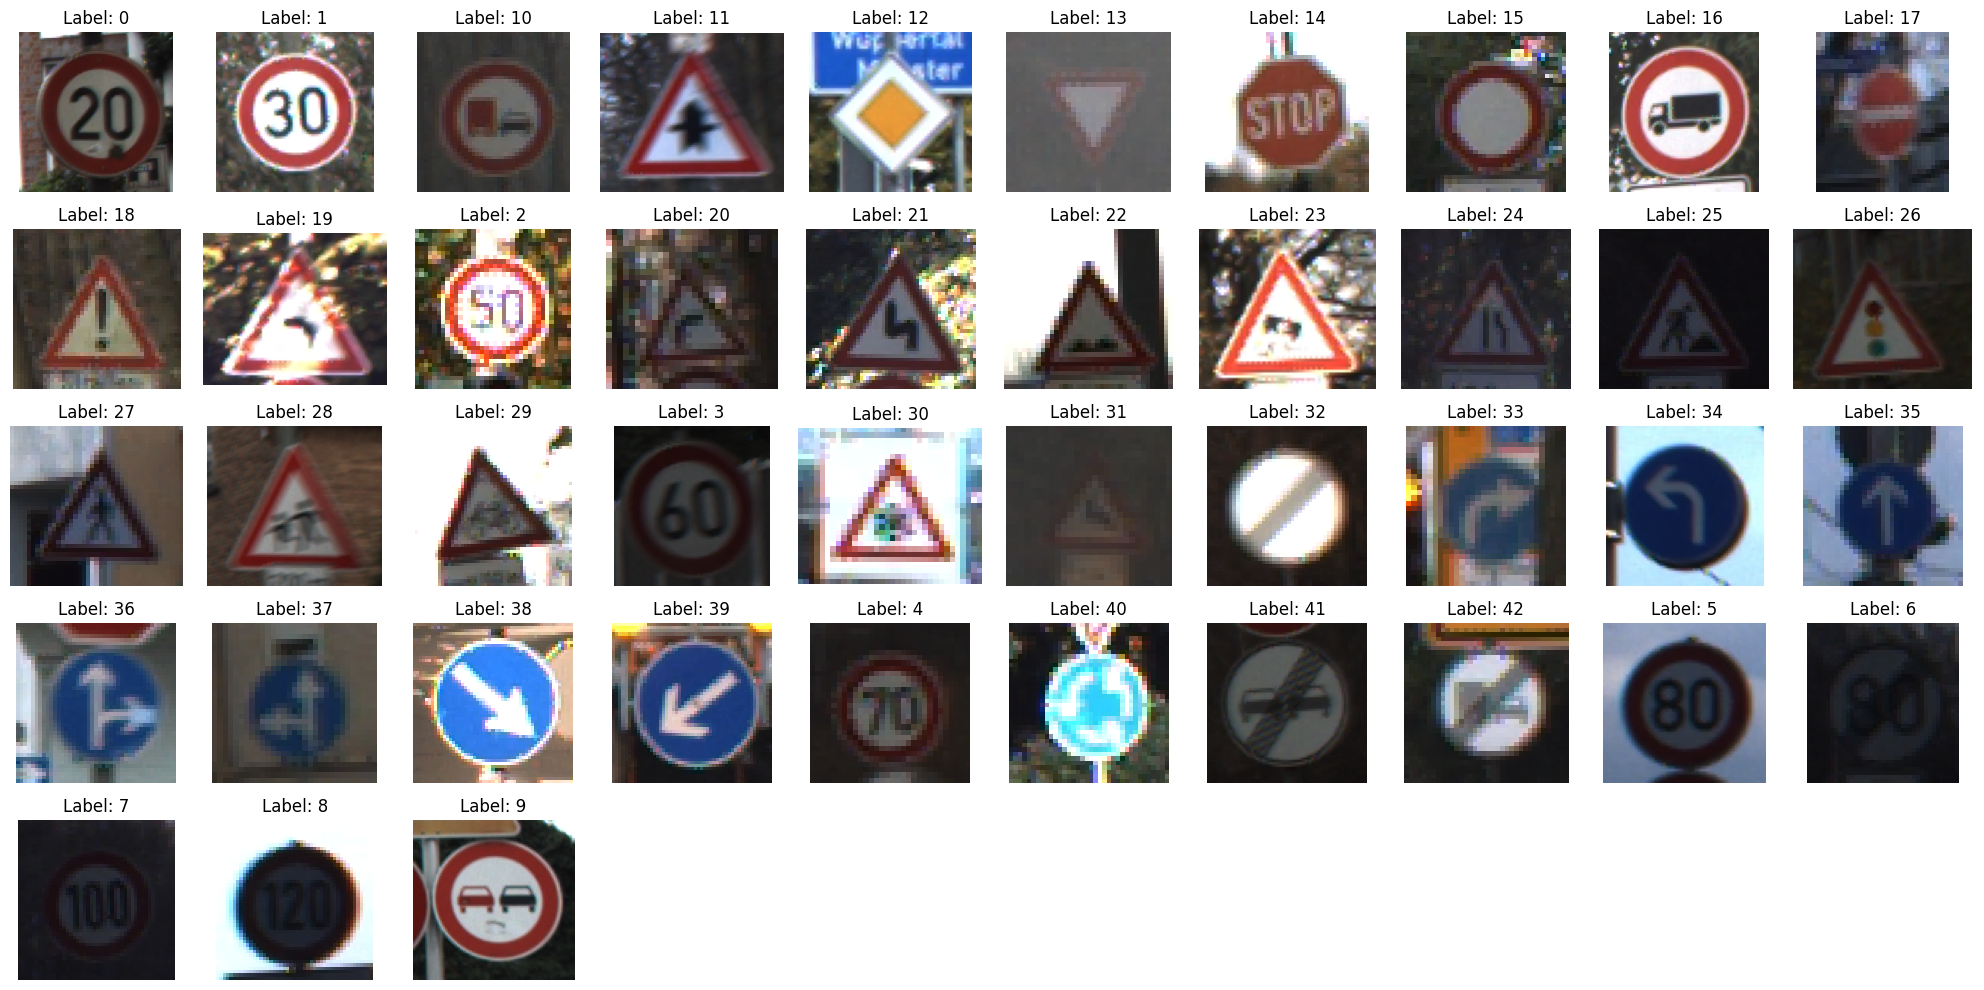

In [18]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to the training dataset
train_dir = './data/Train'

# Get the list of class directories
class_dirs = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])
num_classes = len(class_dirs)

# Initialize a dictionary to hold image paths grouped by labels
images_by_class = {label: [] for label in class_dirs}

# Iterate through the training directory
for root, dirs, files in os.walk(train_dir):
    for file in files:
        if file.endswith('.png'):
            label = os.path.basename(root)
            if label in images_by_class:
                images_by_class[label].append(os.path.join(root, file))

# Display basic information about the dataset
num_images = sum(len(images) for images in images_by_class.values())
print(f"Number of images: {num_images}")
print(f"Number of classes: {num_classes}")

# Select one random image from each class
selected_images = [random.choice(images_by_class[label]) for label in class_dirs]

# Display the selected images
rows = (num_classes + 9) // 10  # Calculate the number of rows needed
fig, axes = plt.subplots(rows, 10, figsize=(20, 2 * rows))

for i, img_path in enumerate(selected_images):
    row = i // 10
    col = i % 10
    img = mpimg.imread(img_path)
    axes[row, col].imshow(img)
    axes[row, col].set_title(f"Label: {class_dirs[i]}")
    axes[row, col].axis('off')

# Hide any unused subplots
for j in range(i + 1, rows * 10):
    row = j // 10
    col = j % 10
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

Total number of images: 39209


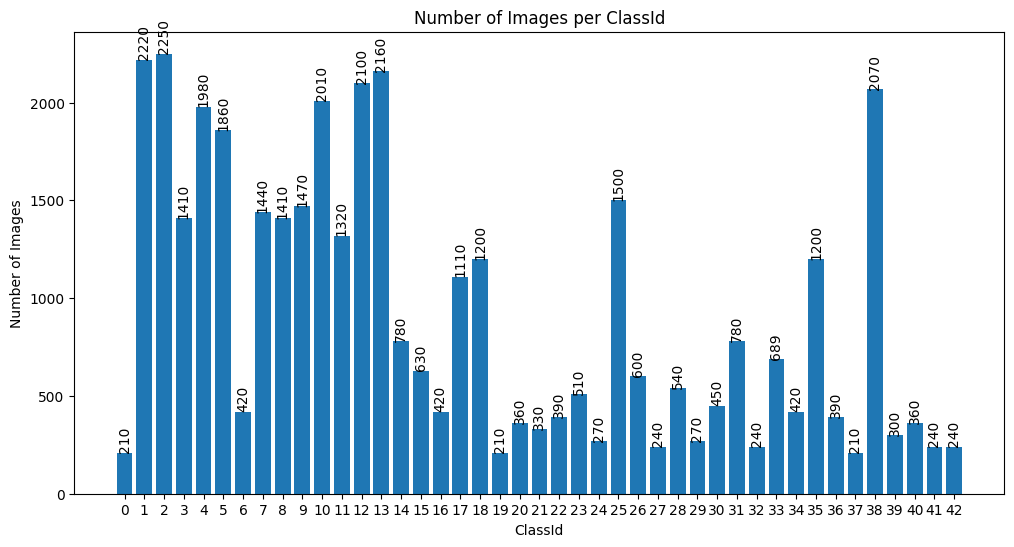

Maximum Width: 243
Maximum Height: 225


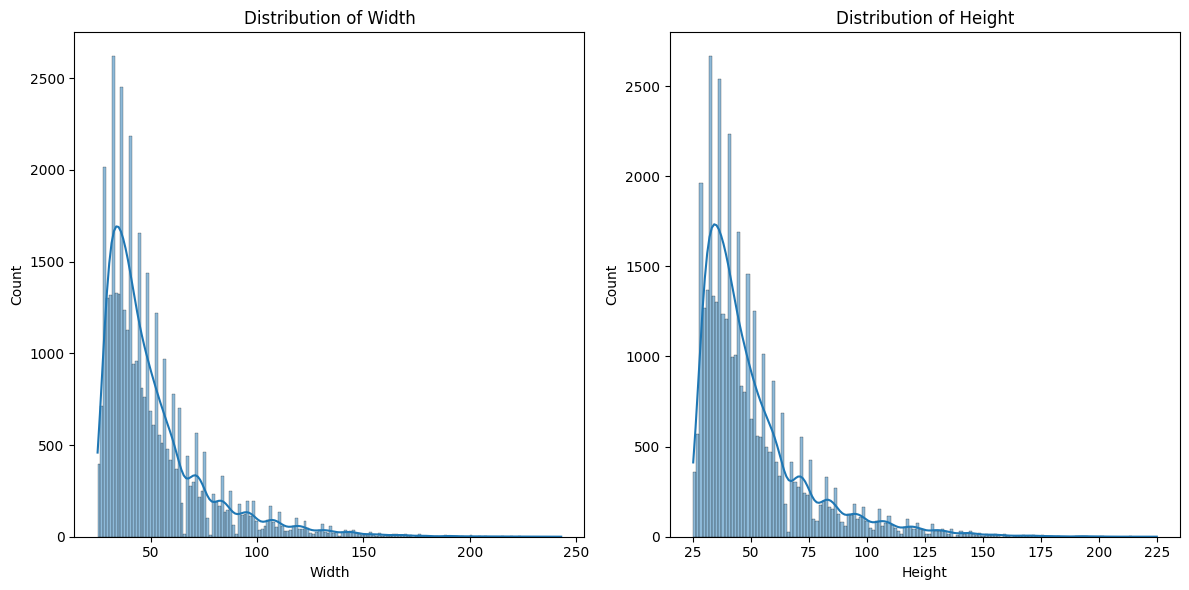

In [15]:
import pandas as pd
import seaborn as sns

# Load the CSV file into a DataFrame
csv_path = './data/Train.csv'
df = pd.read_csv(csv_path)

# Count the total number of images
total_images = len(df)
print(f"Total number of images: {total_images}")

# Count the number of images for each ClassId
class_counts = df['ClassId'].value_counts().sort_index()

# Plot the number of images for each ClassId in a bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(class_counts.index, class_counts.values)
plt.xlabel('ClassId')
plt.ylabel('Number of Images')
plt.title('Number of Images per ClassId')

# Add the number of images on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', rotation=90)

# Show x-axis labels
plt.xticks(ticks=class_counts.index, labels=class_counts.index)
plt.show()

# Print the maximum Width and Height
max_width = df['Width'].max()
max_height = df['Height'].max()
print(f"Maximum Width: {max_width}")
print(f"Maximum Height: {max_height}")

# Show distribution plots for Width and Height
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Width'], kde=True)
plt.title('Distribution of Width')

plt.subplot(1, 2, 2)
sns.histplot(df['Height'], kde=True)
plt.title('Distribution of Height')

plt.tight_layout()
plt.show()